# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision: Practice of writing algorithms which can discover patterns in visual data. e.g. Camera of a self-driving car recognizing other cars in view.

The images being worked with are from the Food101 dataset
(101 different classes of food): https://www.kaggle.com/dansbecker/food-101

We've modified it to only use two classes (pizza & steak) using the image data modification notebook

**Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [5]:
import zipfile

# Get data
!wget -nc --no-clobber https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

File ‘pizza_steak.zip’ already there; not retrieving.



In [6]:
# Inspect data
!ls pizza_steak/train/pizza
# !ls pizza_steak/train/steak


1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
import os
# Walk through pizza_steak dir and list # of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [8]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


750

In [9]:
# To visualize our images, first let's get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
# Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  Takes target_dir and target_class as strings
  Displays a random image witn class and shape
  returns the image
  """
  # Setup the target dir (we'll view images from here)
  target_folder = target_dir+target_class
  
  # Get random img path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape: {img.shape}")
  return img


Image shape: (512, 512, 3)


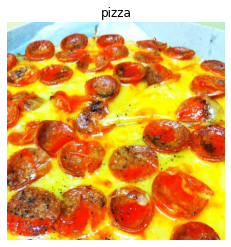

In [11]:
# Try the 
img = view_random_image("pizza_steak/train/","pizza")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[224, 241, 197],
        [228, 245, 201],
        [228, 245, 200],
        ...,
        [185, 239, 205],
        [183, 237, 203],
        [180, 234, 200]],

       [[226, 243, 199],
        [229, 246, 201],
        [229, 246, 201],
        ...,
        [183, 237, 203],
        [182, 236, 202],
        [181, 235, 201]],

       [[228, 246, 198],
        [231, 249, 201],
        [230, 250, 201],
        ...,
        [185, 236, 203],
        [185, 236, 203],
        [185, 236, 203]],

       ...,

       [[248, 253,  36],
        [245, 251,  31],
        [242, 248,  28],
        ...,
        [244, 244,   0],
        [244, 242,   7],
        [244, 241,  12]],

       [[246, 254,  33],
        [245, 253,  32],
        [244, 250,  28],
        ...,
        [246, 242,   0],
        [247, 241,   7],
        [245, 240,  14]],

       [[244, 252,  31],
        [244, 252,  31],
        [245, 253,  30],
        ...,
        [248, 242,   

In [13]:
# View img shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [14]:
# Normalize the values
img/255. # max pixel value 255

array([[[0.87843137, 0.94509804, 0.77254902],
        [0.89411765, 0.96078431, 0.78823529],
        [0.89411765, 0.96078431, 0.78431373],
        ...,
        [0.7254902 , 0.9372549 , 0.80392157],
        [0.71764706, 0.92941176, 0.79607843],
        [0.70588235, 0.91764706, 0.78431373]],

       [[0.88627451, 0.95294118, 0.78039216],
        [0.89803922, 0.96470588, 0.78823529],
        [0.89803922, 0.96470588, 0.78823529],
        ...,
        [0.71764706, 0.92941176, 0.79607843],
        [0.71372549, 0.9254902 , 0.79215686],
        [0.70980392, 0.92156863, 0.78823529]],

       [[0.89411765, 0.96470588, 0.77647059],
        [0.90588235, 0.97647059, 0.78823529],
        [0.90196078, 0.98039216, 0.78823529],
        ...,
        [0.7254902 , 0.9254902 , 0.79607843],
        [0.7254902 , 0.9254902 , 0.79607843],
        [0.7254902 , 0.9254902 , 0.79607843]],

       ...,

       [[0.97254902, 0.99215686, 0.14117647],
        [0.96078431, 0.98431373, 0.12156863],
        [0.94901961, 0

## An end-to-end example

Build a convolutional neural network to find patterns in our images.

* Load our images
* Preprocess our images (normalize)
* Build a CNN to find patterns
* Compile the CNN
* Fit the CNN to our training data

In [15]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
# Created a class for creating and fitting models cuz I got sick of writing it over and over again.
# set the seed
tf.random.set_seed(42)
class ComputerVisionModel():
  def __init__(self, train_dir, test_dir, batch_size = 32, target_size=(224,224), class_mode="binary", seed=42, epochs=5, rescale=1./255):
    self.train_dir = train_dir
    self.test_dir = test_dir
    self.batch_size = batch_size
    self.target_size = target_size
    self.class_mode = class_mode # binary or sparse, categorical, raw or multi_output, input or none
    self.seed = seed
    self.epochs = epochs
    # Preprocess data (normalize pixel data from images)
    self.train_datagen = ImageDataGenerator(rescale=rescale)
    self.valid_datagen = ImageDataGenerator(rescale=rescale)
     # Import data from directories and turn it into batches
    self.train_data = self.train_datagen.flow_from_directory(
        directory=self.train_dir, 
        batch_size=self.batch_size,
        target_size=self.target_size,
        class_mode=self.class_mode, 
        seed=self.seed
        )
  
    self.valid_data = self.valid_datagen.flow_from_directory(
        directory=self.test_dir, 
        batch_size=self.batch_size,
        target_size=self.target_size,
        class_mode=self.class_mode, 
        seed=self.seed
        )

  def create_model(self, layers):
    """
    Returns a model, takes tensorflow Sequential layers parameters
    """
    # Build a CNN model (same as Tiny VGG on the CNN explainer website)
    model = Sequential(layers)
    return model

  def fit(self, model):
    """
    Returns history. Takes model and fits it
    """
    history = model.fit(
        self.train_data, 
        epochs=self.epochs,
        steps_per_epoch=len(self.train_data),
        validation_data=self.valid_data,
        validation_steps=len(self.valid_data)
        )
    return history

  def plot_loss_curves(self, history):
    """
    Returns separate loss curves for training and validation metrics, takes history
    """ 
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # How many epochs did we run for
    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

  def view_random_training_image(self, target_class):
    """
    Takes target_class as string
    Displays a random image witn class and shape
    returns the image
    """
    # Setup the target dir (we'll view images from here)
    target_folder = train_dir+"/"+target_class
    
    # Get random img path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)

    print(f"Image shape: {img.shape}")
    return img
 

In [16]:
# remember to switch runtime to use GPU `runtime>change runtime type`
model_initializer = ComputerVisionModel(train_dir="pizza_steak/train", test_dir="pizza_steak/test")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
model = model_initializer.create_model(layers=[
        tf.keras.layers.Conv2D(
            filters=19,
            kernel_size=3,
            activation="relu",
            input_shape=(224, 224, 3)
        ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(
            pool_size=2,
            padding="valid"
            ),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ])

# Compile CNN
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )
history_1 = model_initializer.fit(model=model)

Epoch 1/5
47/47 [==============================] - 14s 221ms/step - loss: 0.6108 - accuracy: 0.6660 - val_loss: 0.4479 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4557 - accuracy: 0.7847 - val_loss: 0.4104 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4108 - accuracy: 0.8200 - val_loss: 0.4095 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3622 - accuracy: 0.8487 - val_loss: 0.3115 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.3216 - accuracy: 0.8680 - val_loss: 0.3107 - val_accuracy: 0.8680


In [18]:
history_1.history

{'accuracy': [0.6660000085830688,
  0.7846666574478149,
  0.8199999928474426,
  0.8486666679382324,
  0.8679999709129333],
 'loss': [0.6108158826828003,
  0.4557420611381531,
  0.4108152389526367,
  0.3622051477432251,
  0.3216467797756195],
 'val_accuracy': [0.7839999794960022,
  0.8119999766349792,
  0.7979999780654907,
  0.871999979019165,
  0.8679999709129333],
 'val_loss': [0.4478752911090851,
  0.4104241728782654,
  0.40951889753341675,
  0.3114664852619171,
  0.31073033809661865]}

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create a 2nd model
# Set random seed
tf.random.set_seed(42)

# Create
model_2 = model_initializer.create_model(
    layers=[
            tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
            ])

# Compile CNN
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )

history_2 = model_initializer.fit(model=model_2)

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 2.1848 - accuracy: 0.5160 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [20]:
# Same as above, just add an extra layer and add more neurons
tf.random.set_seed(42)

# Create
model_3 = model_initializer.create_model(
    layers=[
     tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# Compile
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_3 = model_initializer.fit(model=model_3)

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 2.3284 - accuracy: 0.6113 - val_loss: 0.5960 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.8883 - accuracy: 0.7107 - val_loss: 0.6533 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.8803 - accuracy: 0.6833 - val_loss: 0.8066 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.8718 - accuracy: 0.7173 - val_loss: 0.8765 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6433 - accuracy: 0.7460 - val_loss: 0.5333 - val_accuracy: 0.7780


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification

1. Visualize, Visualize, Visualize
2. Preprocess the data (normalize)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### Visualize

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


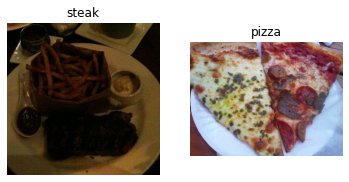

In [22]:

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### Preprocess Data

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Organize the data into **batches**

Batch: small subset of data.  Rather than look at all ~15k images at one time, a model might only look at 32 at a time.

**It does this for a a couple of reasons:**
1. 15,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patternsin 15k images in one hit could result in the model not being able to learn very well.


**Why batch size of 32?**
32 is a generally accepted mini-batch size.

However, mini-batch size is a hyperparameter that needs to be tuned according to your data and chosen model for optimal performance.

With smaller batch sizes the estimate of gradient in each epoch is more noisy but it helps the algorithm to avoid local minima. But it also makes training less efficient if you go too low as the weights will jump around too much and the cost will converge much more slowly.

In [24]:
# Checking the GPU
!nvidia-smi

Tue Aug  2 18:12:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    32W /  70W |   4076MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
# Create train and test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# When loading images, divide all pixel values by 255, this normalizes all the images
rescale_val = 1/255.

model_initializer = ComputerVisionModel(
    train_dir="pizza_steak/train/", 
    test_dir="pizza_steak/test/",
    batch_size = 32, 
    target_size=(224,224), 
    class_mode="binary", 
    seed=42, 
    epochs=5, 
    rescale=rescale_val
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
images, labels = model_initializer.train_data.next() # get the 'next' batch of images/labels in train_data
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [27]:
images[7], images[7].shape

(array([[[0.16078432, 0.10980393, 0.13725491],
         [0.16078432, 0.10980393, 0.13725491],
         [0.16862746, 0.11764707, 0.14509805],
         ...,
         [0.10980393, 0.1137255 , 0.12941177],
         [0.11764707, 0.12156864, 0.12941177],
         [0.09019608, 0.10588236, 0.10980393]],
 
        [[0.1764706 , 0.1254902 , 0.15294118],
         [0.17254902, 0.12156864, 0.14901961],
         [0.1764706 , 0.13333334, 0.15686275],
         ...,
         [0.12156864, 0.10196079, 0.11764707],
         [0.1137255 , 0.10588236, 0.11764707],
         [0.10588236, 0.10588236, 0.1137255 ]],
 
        [[0.17254902, 0.12156864, 0.14901961],
         [0.16078432, 0.11764707, 0.14117648],
         [0.16470589, 0.12156864, 0.14509805],
         ...,
         [0.20392159, 0.16078432, 0.1764706 ],
         [0.17254902, 0.13725491, 0.15686275],
         [0.12941177, 0.10196079, 0.12941177]],
 
        ...,
 
        [[0.09019608, 0.09019608, 0.12941177],
         [0.09411766, 0.09411766, 0.13333

In [28]:
# View labels for the first batch
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

###3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment.  As you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best w2ays to get started is to begin with something simple and see if it works on your data and then introduce complexity as required. (look up which current model is performing best in the field of your problem)

#### Check out [Papers With Code](https://paperswithcode.com/)

In [29]:
# Create a models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

# Same as above, just add an extra layer and add more neurons
tf.random.set_seed(42)

model_4 = model_initializer.create_model(
    layers=[
            Conv2D(
                filters=10,# number of sliding windows going across an input (higher = more complex model)
                kernel_size=3, # (3,3), # size of the sliding window across an input
                strides=1, # (1,1), # size of the step the sliding window takes across an input
                padding="valid",
                activation="relu",
                input_shape=(224, 224, 3) # input layer (specify input shape)
            ),
            Conv2D(10, 3, activation="relu"),
            Conv2D(10, 3, activation="relu"),
            Flatten(),
            Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
            ])

In [30]:
# Compile
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
# Fit
history_4 = model_initializer.fit(model_4)

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 0.7437 - accuracy: 0.6693 - val_loss: 0.5695 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.5193 - accuracy: 0.7540 - val_loss: 0.4064 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4386 - accuracy: 0.8100 - val_loss: 0.4118 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 10s 202ms/step - loss: 0.3189 - accuracy: 0.8713 - val_loss: 0.3978 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.2019 - accuracy: 0.9347 - val_loss: 0.3564 - val_accuracy: 0.8380


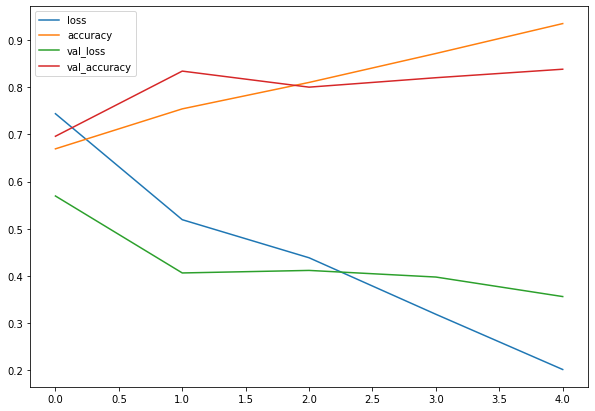

In [32]:
# Evaluate - plot training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.

It's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

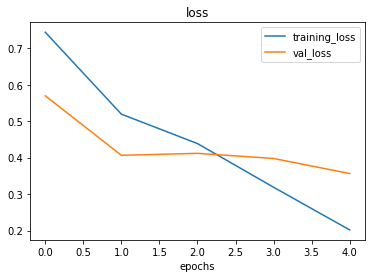

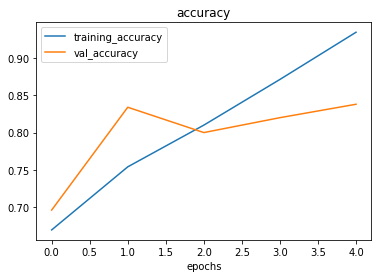

In [33]:
model_initializer.plot_loss_curves(history_4)


### Adjust the model parameters

**Fitting a machine learning model comes in 3 steps:**

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

**Ways to induce overfitting:**

* Increase # of conv layers
* Increase # of conv filters
* Add another dense layer to the output of our flattened layer

**Ways to reduce overfitting:**

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**

In [34]:
# Same as above, just add an extra layer and add more neurons
tf.random.set_seed(42)
# Create a new model
model_5 = model_initializer.create_model(
    layers=[
            Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
            MaxPool2D(pool_size=2),
            Conv2D(10, 3, activation="relu"),
            MaxPool2D(), 
            Conv2D(10, 3, activation="relu"),
            MaxPool2D(),
            Flatten(),
            Dense(1, activation="sigmoid")
    ])

In [35]:
# Compile
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])
# Fit
history_5 = model_initializer.fit(model_5)

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.5941 - accuracy: 0.6727 - val_loss: 0.4785 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4502 - accuracy: 0.8027 - val_loss: 0.3655 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3978 - accuracy: 0.8260 - val_loss: 0.3459 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3802 - accuracy: 0.8347 - val_loss: 0.3265 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3745 - accuracy: 0.8440 - val_loss: 0.3053 - val_accuracy: 0.8880


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

(None, None)

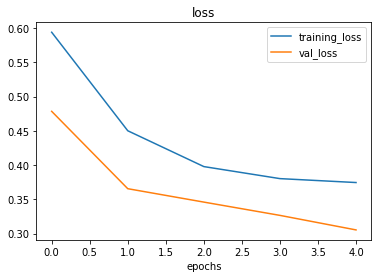

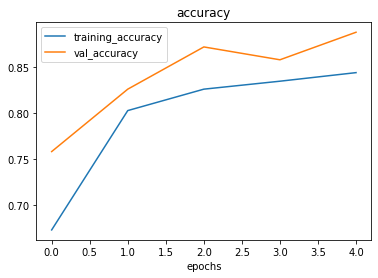

In [36]:
model_initializer.plot_loss_curves(history_5), model_5.summary()

### MaxPool2D()
Selects 1 max pixel value from all pixels within range of kernel

### Conv2D
Slides matrix of weights, multiplies by pixel value then sums all results.

### Data Augmentation

In [37]:
# Create imageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # how much do you want to zoom?
                                             width_shift_range=0.2, # move image around on X axis
                                             height_shift_range=0.3, # move image around on Y axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)




**Question:** What is data augmentation?

Data Augmentation: the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.

Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something similar.

Let's write some code to visualize data augmentation...

In [38]:
# Import data and augment it from training directory

IMG_SIZE = (224, 224)
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only, usually true

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)     
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, 
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary")                                                      

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` build-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Let's visualize the augmented data:

In [39]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only data


Showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

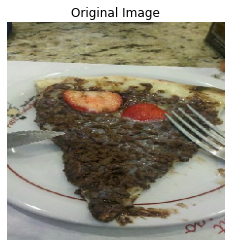

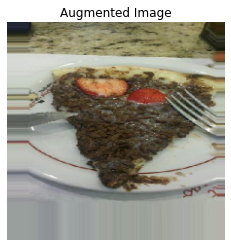

In [40]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # bath sizes are 32...

print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()


plt.imshow(augmented_images[random_number])
plt.title(f'Augmented Image')
plt.axis(False)


<table>
<colgroup><col width="214px"><col></colgroup>
<tbody><tr><th colspan="2"><h2><span>ImageDataGenerator Args</span></h2></th></tr>
<tr>
<td>
<code translate="no" dir="ltr">featurewise_<wbr>center</code><a id="featurewise_center"></a>
</td>
<td>
Boolean. Set input mean to 0 over the dataset,
feature-wise.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">samplewise_<wbr>center</code><a id="samplewise_center"></a>
</td>
<td>
Boolean. Set each sample mean to 0.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">featurewise_<wbr>std_<wbr>normalization</code><a id="featurewise_std_normalization"></a>
</td>
<td>
Boolean. Divide inputs by std of the
dataset, feature-wise.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">samplewise_<wbr>std_<wbr>normalization</code><a id="samplewise_std_normalization"></a>
</td>
<td>
Boolean. Divide each input by its std.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">zca_<wbr>epsilon</code><a id="zca_epsilon"></a>
</td>
<td>
epsilon for ZCA whitening. Default is 1e-6.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">zca_<wbr>whitening</code><a id="zca_whitening"></a>
</td>
<td>
Boolean. Apply ZCA whitening.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">rotation_<wbr>range</code><a id="rotation_range"></a>
</td>
<td>
Int. Degree range for random rotations.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">width_<wbr>shift_<wbr>range</code><a id="width_shift_range"></a>
</td>
<td>
Float, 1-D array-like or int<p></p>

<ul>
<li>float: fraction of total width, if &lt; 1, or pixels if &gt;= 1.</li>
<li>1-D array-like: random elements from the array.</li>
<li>int: integer number of pixels from interval <code translate="no" dir="ltr">(-width_shift_range,
+width_shift_range)</code> - With <code translate="no" dir="ltr">width_shift_range=2</code> possible values
are integers <code translate="no" dir="ltr">[-1, 0, +1]</code>, same as with <code translate="no" dir="ltr">width_shift_range=[-1, 0,
+1]</code>, while with <code translate="no" dir="ltr">width_shift_range=1.0</code> possible values are floats
in the interval [-1.0, +1.0).
</li></ul></td>
</tr><tr>
<td>
<code translate="no" dir="ltr">height_<wbr>shift_<wbr>range</code><a id="height_shift_range"></a>
</td>
<td>
Float, 1-D array-like or int
<li>float: fraction of total height, if &lt; 1, or pixels if &gt;= 1.</li>
<li>1-D array-like: random elements from the array.</li>
<li>int: integer number of pixels from interval <code translate="no" dir="ltr">(-height_shift_range,
+height_shift_range)</code> - With <code translate="no" dir="ltr">height_shift_range=2</code> possible values
are integers <code translate="no" dir="ltr">[-1, 0, +1]</code>, same as with <code translate="no" dir="ltr">height_shift_range=[-1, 0,
+1]</code>, while with <code translate="no" dir="ltr">height_shift_range=1.0</code> possible values are floats
in the interval [-1.0, +1.0).
</li></td>
</tr><tr>
<td>
<code translate="no" dir="ltr">brightness_<wbr>range</code><a id="brightness_range"></a>
</td>
<td>
Tuple or list of two floats. Range for picking a
brightness shift value from.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">shear_<wbr>range</code><a id="shear_range"></a>
</td>
<td>
Float. Shear Intensity (Shear angle in counter-clockwise
direction in degrees)
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">zoom_<wbr>range</code><a id="zoom_range"></a>
</td>
<td>
Float or [lower, upper]. Range for random zoom. If a float,
<code translate="no" dir="ltr">[lower,<wbr> upper] = [1-zoom_<wbr>range,<wbr> 1+zoom_<wbr>range]</code>.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">channel_<wbr>shift_<wbr>range</code><a id="channel_shift_range"></a>
</td>
<td>
Float. Range for random channel shifts.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">fill_<wbr>mode</code><a id="fill_mode"></a>
</td>
<td>
One of {"constant", "nearest", "reflect" or "wrap"}. Default is
'nearest'. Points outside the boundaries of the input are filled
according to the given mode:
<ul>
<li>'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)</li>
<li>'nearest':  aaaaaaaa|abcd|dddddddd</li>
<li>'reflect':  abcddcba|abcd|dcbaabcd</li>
<li>'wrap':  abcdabcd|abcd|abcdabcd
</li></ul></td>
</tr><tr>
<td>
<code translate="no" dir="ltr">cval</code><a id="cval"></a>
</td>
<td>
Float or Int. Value used for points outside the boundaries when
<code translate="no" dir="ltr">fill_<wbr>mode = "constant"</code>.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">horizontal_<wbr>flip</code><a id="horizontal_flip"></a>
</td>
<td>
Boolean. Randomly flip inputs horizontally.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">vertical_<wbr>flip</code><a id="vertical_flip"></a>
</td>
<td>
Boolean. Randomly flip inputs vertically.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">rescale</code><a id="rescale"></a>
</td>
<td>
rescaling factor. Defaults to None. If None or 0, no rescaling is
applied, otherwise we multiply the data by the value provided (after
applying all other transformations).
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">preprocessing_<wbr>function</code><a id="preprocessing_function"></a>
</td>
<td>
function that will be applied on each input. The
function will run after the image is resized and augmented.
The function should take one argument: one image (Numpy tensor with
rank 3), and should output a Numpy tensor with the same shape.
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">data_<wbr>format</code><a id="data_format"></a>
</td>
<td>
Image data format, either "channels_first" or
"channels_last". "channels_last" mode means that the images should have
shape <code translate="no" dir="ltr">(samples,<wbr> height,<wbr> width,<wbr> channels)</code>, "channels_first" mode means
that the images should have shape <code translate="no" dir="ltr">(samples,<wbr> channels,<wbr> height,<wbr> width)</code>.
It defaults to the <code translate="no" dir="ltr">image_<wbr>data_<wbr>format</code> value found in your Keras config
file at <code translate="no" dir="ltr">~/<wbr>.<wbr>keras/<wbr>keras.<wbr>json</code>. If you never set it, then it will be
"channels_last".
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">validation_<wbr>split</code><a id="validation_split"></a>
</td>
<td>
Float. Fraction of images reserved for validation
(strictly between 0 and 1).
</td>
</tr><tr>
<td>
<code translate="no" dir="ltr">dtype</code><a id="dtype"></a>
</td>
<td>
Dtype to use for the generated arrays.
</td>
</tr>
</tbody></table>

### Build a model and train using augmented data

Same as model 5 but using augmented data

In [41]:
# Import data and augment it from training directory

IMG_SIZE = (224, 224)
print("Augmented training data:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) 

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data_shuffled = train_datagen.flow_from_directory(train_dir, 
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)     
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, 
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary")     

# Create new Model
model_6 = model_initializer.create_model(layers=[
            Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
            MaxPool2D(pool_size=2),
            Conv2D(10, 3, activation="relu"),
            MaxPool2D(), 
            Conv2D(10, 3, activation="relu"),
            MaxPool2D(),
            Flatten(),
            Dense(1, activation="sigmoid")
    ])
# Compile
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])
# Fit

history_6 = model_6.fit(
    train_data_augmented, 
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
    )

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 487ms/step - loss: 0.7175 - accuracy: 0.4860 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6942 - accuracy: 0.5360 - val_loss: 0.6777 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6845 - accuracy: 0.5880 - val_loss: 0.6386 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6731 - accuracy: 0.6033 - val_loss: 0.6018 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6341 - accuracy: 0.6567 - val_loss: 0.5328 - val_accuracy: 0.8240


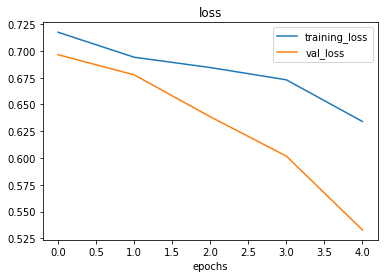

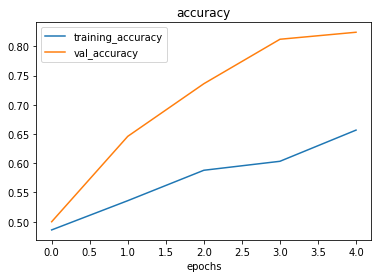

In [42]:
# Check training curves
model_initializer.plot_loss_curves(history_6)

### Repeat until satisfied

Options:
* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each covolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

**Practice:** Recreate the model on the CNN explainer webiste (same as model_1) and see how it performs on the augmented shuffled training data.


In [43]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6893 - accuracy: 0.5660 - val_loss: 0.6124 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6017 - accuracy: 0.6867 - val_loss: 0.5299 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 24s 510ms/step - loss: 0.5327 - accuracy: 0.7407 - val_loss: 0.4586 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5306 - accuracy: 0.7327 - val_loss: 0.4000 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5021 - accuracy: 0.7680 - val_loss: 0.3609 - val_accuracy: 0.8200


In [44]:
# Create a function to import and resize an img to a size that's usable in our model
# Download custom image
import matplotlib.image as mpimg
!wget -nc --no-clobber https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, 
  turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_jpeg(img) 
  # Resize
  img = tf.image.resize(img,size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1 {normalized})
  img = img/255.
  return img
# Load in and preprocess a custom image
steak = load_and_prep_image(filename='03-steak.jpeg')

pred=model_7.predict(tf.expand_dims(steak, axis=0))
        

File ‘03-steak.jpeg’ already there; not retrieving.



Looks like our custome image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we coudl visualize the image as well as the model's prediction?

In [45]:
# Remind ourself of the class names
class_names


array(['pizza', 'steak'], dtype='<U5')

In [46]:
# We can index the predicted class by rounding the prediction probability and indexing on the class names
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [47]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



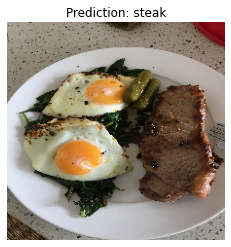

In [48]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)


File ‘03-pizza-dad.jpeg’ already there; not retrieving.



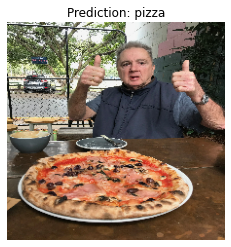

In [49]:
# Download another test custom image and make a prediction on it
!wget -nc --no-clobber https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = load_and_prep_image(filename='03-pizza-dad.jpeg')
# Test our model on a custom image
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)



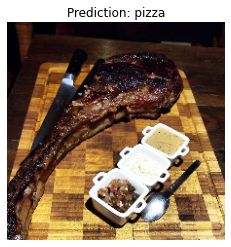

In [50]:
# Try my own image
pred_and_plot(model_7, "drive/MyDrive/tensorflow_course/steak_custom.jpg", class_names)

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [51]:
import zipfile
!wget -nc --no-clobber https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

File ‘10_food_classes_all_data.zip’ already there; not retrieving.



In [52]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [53]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

### Visualize

In [54]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 384, 3)


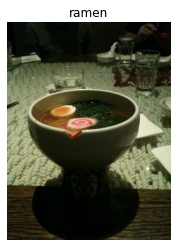

In [55]:
# View an image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess the data (prepare it for the model)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224), 
                                             batch_size=32,
                                             class_mode='categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (start with a baseline)

In [57]:
# Create a model w/ baseline (clone of cnn explainer)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 output neurons (10 classes) and use softmax activation function
])

### Compile the model

In [58]:
# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


### Fit the model

In [59]:
# Fit the model
history_8 = model_8.fit(train_data, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 204ms/step - loss: 2.1053 - accuracy: 0.2349 - val_loss: 1.9237 - val_accuracy: 0.3284
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.8007 - accuracy: 0.3852 - val_loss: 1.8150 - val_accuracy: 0.3596
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.5246 - accuracy: 0.4929 - val_loss: 1.9977 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 47s 201ms/step - loss: 1.0198 - accuracy: 0.6667 - val_loss: 2.2571 - val_accuracy: 0.3184
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 0.4396 - accuracy: 0.8687 - val_loss: 2.9169 - val_accuracy: 0.3168


### Evaluate the model

In [60]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 2.9169 - accuracy: 0.3168


[2.9169085025787354, 0.31679999828338623]

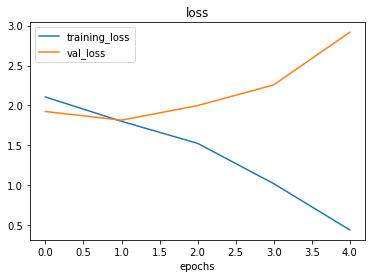

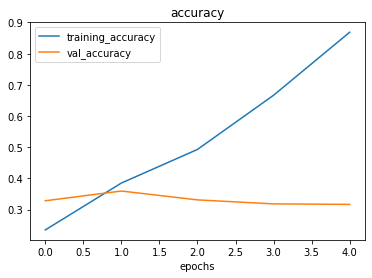

In [61]:
# check out the model's loss curves on the 10 classes

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics, takes history
    """ 
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # How many epochs did we run for
    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_loss_curves(history_8)

What do these loss curves tell us?

Our model is **overfitting** the training set
It's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### Adjust model parameters

Due to it's performance on the trainin data, it's clear our model is learning something but it's not generalizing well to unseen data.

Let's try to fix overfitting by:

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns
* **Simplify the model** - If the current model is overfitting the data, it may be too complicated of a model.  One way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **Use data augmentation** - Data augmentation manipulates the training data in such a way to add more diversity to it (without alterning the original data)
* **Use transfer learning** - Leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.


In [62]:
# Try simplifying the model first
# Remove 2 convolutional layers from the model
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 output neurons (10 classes) and use softmax activation function
])
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.1200 - accuracy: 0.2529 - val_loss: 1.9709 - val_accuracy: 0.3120
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.7603 - accuracy: 0.3980 - val_loss: 1.8633 - val_accuracy: 0.3668
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.3977 - accuracy: 0.5491 - val_loss: 1.9449 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 0.9705 - accuracy: 0.7060 - val_loss: 2.1128 - val_accuracy: 0.3492
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.5548 - accuracy: 0.8516 - val_loss: 2.3919 - val_accuracy: 0.3264


In [63]:
model_8.summary(), model_9.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

(None, None)

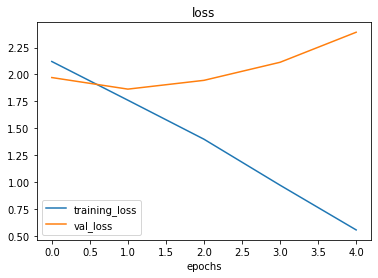

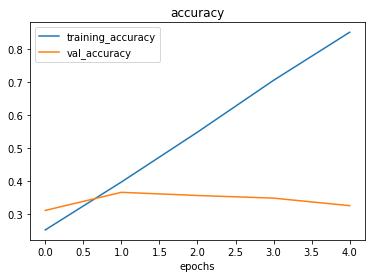

In [64]:
# Check out loss curves
plot_loss_curves(history_9)

### Trying to reduce overfitting with data augmentation

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [65]:
# Create imageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             zoom_range=0.2, # how much do you want to zoom?
                                             width_shift_range=0.2, # move image around on X axis
                                             height_shift_range=0.3, # move image around on Y axis
                                             horizontal_flip=True) # do you want to flip an image?


In [66]:
# Import data and augment it from training directory
IMG_SIZE = (224, 224)
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="categorical") # for demonstration purposes only, usually true
  

Augmented training data:
Found 7500 images belonging to 10 classes.


### Model Cloning

In [67]:
# Create a model and fit with augmented data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Clone model 8
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit
history_10 = model_10.fit(
    train_data_augmented, 
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
    )

Epoch 1/5
235/235 [==============================] - 116s 491ms/step - loss: 2.2443 - accuracy: 0.1509 - val_loss: 2.1518 - val_accuracy: 0.1868
Epoch 2/5
235/235 [==============================] - 115s 489ms/step - loss: 2.1916 - accuracy: 0.1915 - val_loss: 2.1026 - val_accuracy: 0.2352
Epoch 3/5
235/235 [==============================] - 114s 486ms/step - loss: 2.1355 - accuracy: 0.2345 - val_loss: 2.0251 - val_accuracy: 0.2920
Epoch 4/5
235/235 [==============================] - 114s 485ms/step - loss: 2.0750 - accuracy: 0.2679 - val_loss: 1.9774 - val_accuracy: 0.3092
Epoch 5/5
235/235 [==============================] - 114s 486ms/step - loss: 2.0024 - accuracy: 0.2956 - val_loss: 1.8541 - val_accuracy: 0.3644


In [68]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 2.9169 - accuracy: 0.3168


[2.9169085025787354, 0.31679999828338623]

In [69]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.8541 - accuracy: 0.3644


[1.854142189025879, 0.3643999993801117]

### Repeat until satisfied

Keep going, continually trying to bring our loss curves closer together and trying to improve the validatin/test accuracy.

How?

By running lots of experiments:
* Restructuring our model's architecture (increasing layers/hidden units)
* Adjust the learning rate
* Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* Training for longer (e.g. 10 epochs instead of 5)

* Transfer Learning: Take a model's pre-learned patterns from one problem and tweak them to suit your own problem.  For example, take a model trained on pictures of cars to recognize trucks.

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images

In [70]:
# Reminder for classes
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [71]:
# Download some custom images

!wget -nc --no-clobber https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -nc --no-clobber https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -nc --no-clobber https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -nc --no-clobber https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

File ‘03-hamburger.jpeg’ already there; not retrieving.

File ‘03-pizza-dad.jpeg’ already there; not retrieving.

File ‘03-steak.jpeg’ already there; not retrieving.

File ‘03-sushi.jpeg’ already there; not retrieving.



In [72]:
# Remake pred_and_plot to take multiclass
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Multiclass logic and get the predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


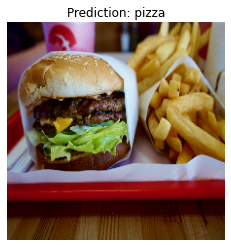

In [76]:
# Make a prediction using model_10
pred_and_plot(model=model_10, 
              filename="03-hamburger.jpeg", 
              class_names=class_names)

### Saving and loading our trained model

In [77]:
# Save a model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [78]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 155ms/step - loss: 1.8541 - accuracy: 0.3644


[1.854142427444458, 0.3643999993801117]

In [80]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 11s 145ms/step - loss: 1.8541 - accuracy: 0.3644


[1.854142427444458, 0.3643999993801117]